# Clustring of Countries on the basis of their Features

In [24]:
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt

# Libraries for Model

In [25]:
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
import sklearn.metrics


# Read Data

In [26]:
raw_data = pd.read_csv("ClusterData.csv")
raw_data.dtypes

State                 object
state_code            object
data science         float64
cluster analysis     float64
college              float64
startup              float64
entrepreneur         float64
ceo                  float64
mortgage             float64
nba                  float64
nfl                  float64
mlb                  float64
fifa                 float64
modern dance         float64
prius                float64
escalade             float64
subaru               float64
jello                float64
bbq                  float64
royal family         float64
obfuscation          float64
unicorn              float64
Extraversion         float64
Agreeableness        float64
Conscientiousness    float64
Neuroticism          float64
Openness             float64
PsychRegions           int64
region                 int64
division               int64
dtype: object

In [27]:
raw_data = pd.read_csv("ClusterData.csv")
raw_data.head()

,State,state_code,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
0,Alabama,AL,-1.00,-0.13,1.10,-0.68,0.15,-0.73,1.53,-0.74,...,-0.32,-1.03,55.5,52.7,55.5,48.7,42.7,1,3,6
1,Arizona,AZ,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,Arkansas,AR,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,California,CA,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,Colorado,CO,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8


# Data Preprocessing

In [28]:
clust_data = raw_data.drop(["State","state_code"], axis=1)
clust_data.drop(index=0).head()

,data science,cluster analysis,college,startup,entrepreneur,ceo,mortgage,nba,nfl,mlb,...,obfuscation,unicorn,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,PsychRegions,region,division
1,-0.42,-0.73,-0.10,0.11,0.57,0.25,0.95,0.38,0.68,0.14,...,0.38,0.10,50.6,46.6,58.4,38.1,54.7,2,4,8
2,-0.66,-0.39,-0.64,-0.08,0.01,-0.66,-0.50,-0.71,-1.59,-1.24,...,-0.45,-0.32,49.9,52.7,41.0,56.2,40.3,1,3,7
3,1.95,-0.62,-0.26,2.02,0.46,1.27,-0.97,1.46,-0.91,0.39,...,0.70,-0.38,51.4,49.0,43.2,39.1,65.0,2,4,9
4,0.34,0.00,-0.61,1.49,0.05,0.33,1.38,-0.80,1.17,-0.51,...,1.32,0.20,45.3,47.5,58.8,34.3,57.9,1,4,8
5,0.69,1.28,1.17,0.41,0.09,1.52,0.51,0.03,-0.64,1.25,...,0.47,0.09,57.6,38.6,34.2,53.4,53.9,3,1,1


# Finding optimal no. of clusters

Text(0.5,1,'Selecting k with the Elbow Point')

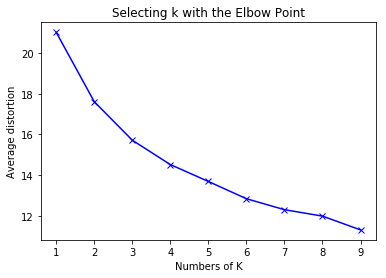

In [29]:
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])

#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('Numbers of K')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Point')

# Clustrig with optimal no of K

In [41]:
final_model=KMeans(3)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)
raw_data["GROUP"] = prediction
cluster_data = raw_data[["GROUP","State"]]

Groups Assigned : 



In [44]:
print("Groups Assigned : \n")
cluster_data.head()

Groups Assigned : 



,GROUP,State
0,1,Alabama
1,0,Arizona
2,2,Arkansas
3,0,California
4,0,Colorado
